In [ ]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import libs
from scipy.stats import norm

In [2]:
# Set global theme settings for plotting
plt.rcParams.update({
    'font.size': 20,          # Set font size
    'lines.linewidth': 3,     # Set default line thickness
    'axes.titlesize': 20,     # Title font size
    'axes.labelsize': 18,     # Axis label font size
    'xtick.labelsize': 14,    # X-tick label font size
    'ytick.labelsize': 14,    # Y-tick label font size
    'grid.color': 'gray',     # Grid color
    'grid.linestyle': '--',   # Grid line style
    'grid.linewidth': 0.5,    # Grid line width
    'legend.fontsize': 16     # Legend font size
})

In [3]:
human_Ud = 2.0
Kimetalsd = -0.009
human_popsize = 10000
mean_segregating = -human_Ud/Kimetalsd
stdv_segregating = np.sqrt(mean_segregating)
iterations = 1000

negative_epistasis = 1.05
positive_epistasis = 0.95

In [4]:
expected_min_Kim, std_error_min_Kim, expected_max_Kim, std_error_max_Kim = libs.get_expected_min_max_poisson_sample(mean_segregating, human_popsize, iterations)
interval_span = 25
segregating_mutations = np.linspace(expected_min_Kim-interval_span, expected_max_Kim+interval_span, 100)


In [14]:
#Generate growth rates and fitness
expected_term = libs.get_expected_overA(mean_segregating, expected_min_Kim, expected_max_Kim, 1)
mult_growthrates = libs.vget_growht_rate(segregating_mutations, Kimetalsd, 1, expected_term)

expected_term = libs.get_expected_overA(mean_segregating, expected_min_Kim, expected_max_Kim, negative_epistasis)
negative_epist_growthrates = libs.vget_growht_rate(segregating_mutations, Kimetalsd, negative_epistasis, expected_term)

expected_term = libs.get_expected_overA(mean_segregating, expected_min_Kim, expected_max_Kim, positive_epistasis)
positive_epist_growthrates = libs.vget_growht_rate(segregating_mutations, Kimetalsd, positive_epistasis, expected_term)

mult_fitness = libs.get_fitness(mult_growthrates)
negative_epis_fitness = libs.get_fitness(negative_epist_growthrates)
positive_epis_fitness = libs.get_fitness(positive_epist_growthrates)

# Generating segregating mutations pdf
pdf = norm.pdf(segregating_mutations, mean_segregating, stdv_segregating)

# Generate pdf*growthrate
mult_growthrate_pdf = pdf * mult_growthrates
negative_epist_growthrate_pdf = pdf * negative_epist_growthrates
positive_epist_growthrate_pdf = pdf * positive_epist_growthrates

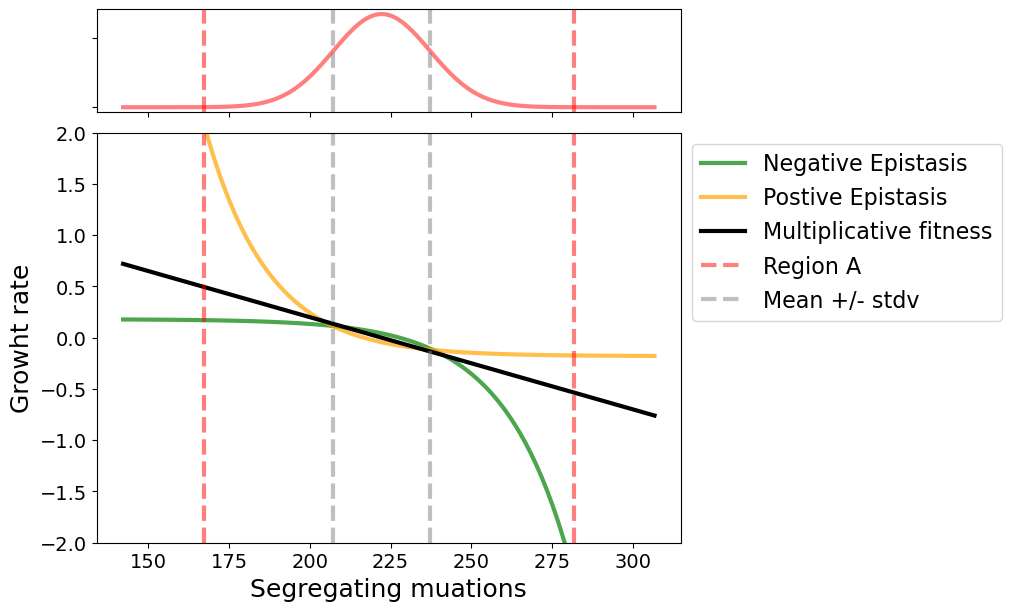

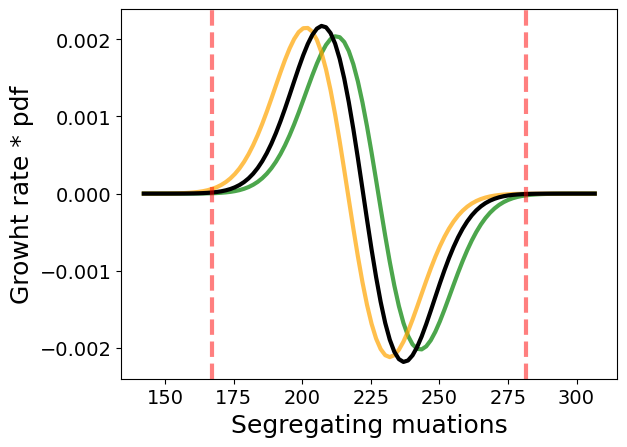

In [15]:
fig, axs = plt.subplot_mosaic([['hist'],
                               ['main']],
                              figsize=(10, 6),  # Set width and height as a tuple
                              height_ratios=(1, 4),
                              layout='constrained')

# the main plot:
axs['main'].plot(segregating_mutations, negative_epist_growthrates, label='Negative Epistasis', alpha=0.7, color='green')
axs['main'].plot(segregating_mutations, positive_epist_growthrates, label='Postive Epistasis', alpha=0.7, color = 'orange')
axs['main'].plot(segregating_mutations, mult_growthrates, label='Multiplicative fitness', color='black')
axs['main'].set_xlabel('Segregating muations')
axs['main'].set_ylabel('Growht rate')
axs['main'].axvline(x=expected_min_Kim, color='red', linestyle='--', alpha=0.5, label='Region A')
axs['main'].axvline(x=expected_max_Kim, color='red', linestyle='--', alpha=0.5)
axs['main'].axvline(x=mean_segregating+stdv_segregating, color='gray', linestyle='--', alpha=0.5, label='Mean +/- stdv')
axs['main'].axvline(x=mean_segregating-stdv_segregating, color='gray', linestyle='--', alpha=0.5)
axs['main'].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs['main'].set_ylim(-2, 2)

axs['hist'].tick_params(axis="x", labelbottom=False)
axs['hist'].tick_params(axis="y", labelleft=False)
axs['hist'].plot(segregating_mutations, pdf, color='red', alpha=0.5, label='Region A')
axs['hist'].axvline(x=expected_min_Kim, color='red', linestyle='--', alpha=0.5, label='Region A')
axs['hist'].axvline(x=expected_max_Kim, color='red', linestyle='--', alpha=0.5)
axs['hist'].axvline(x=mean_segregating+stdv_segregating, color='gray', linestyle='--', alpha=0.5, label='Mean +/- stdv')
axs['hist'].axvline(x=mean_segregating-stdv_segregating, color='gray', linestyle='--', alpha=0.5)


fig.savefig('graphs/growth_rates_model.png', bbox_inches='tight') 
plt.show()
plt.close()


plt.plot(segregating_mutations, negative_epist_growthrate_pdf, label='Negative Epistasis', alpha=0.7, color='green')
plt.plot(segregating_mutations, positive_epist_growthrate_pdf, label='Positive Epistasis', alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_growthrate_pdf, label='Multiplicative fitness', color='black')
plt.xlabel('Segregating muations')
plt.ylabel('Growht rate * pdf')
plt.axvline(x=expected_min_Kim, color='red', linestyle='--', alpha=0.5, label='Region A')
plt.axvline(x=expected_max_Kim, color='red', linestyle='--', alpha=0.5)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.ylim(0, 5)
plt.savefig('graphs/fitnessmodel.png', bbox_inches='tight') 
plt.show()
plt.close()

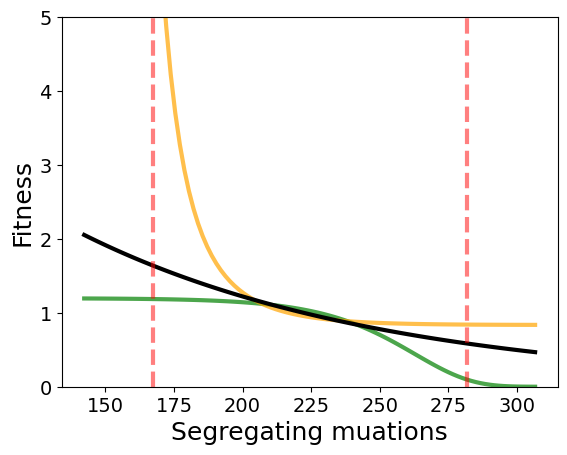

In [16]:
plt.plot(segregating_mutations, negative_epis_fitness, label='Negative Epistasis', alpha=0.7, color='green')
plt.plot(segregating_mutations, positive_epis_fitness, label='Positive Epistasis', alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_fitness, label='Multiplicative fitness', color='black')
plt.xlabel('Segregating muations')
plt.ylabel('Fitness')
plt.axvline(x=expected_min_Kim, color='red', linestyle='--', alpha=0.5, label='Region A')
plt.axvline(x=expected_max_Kim, color='red', linestyle='--', alpha=0.5)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0, 5)
plt.savefig('graphs/fitnessmodel.png', bbox_inches='tight') 
plt.show()
plt.close()

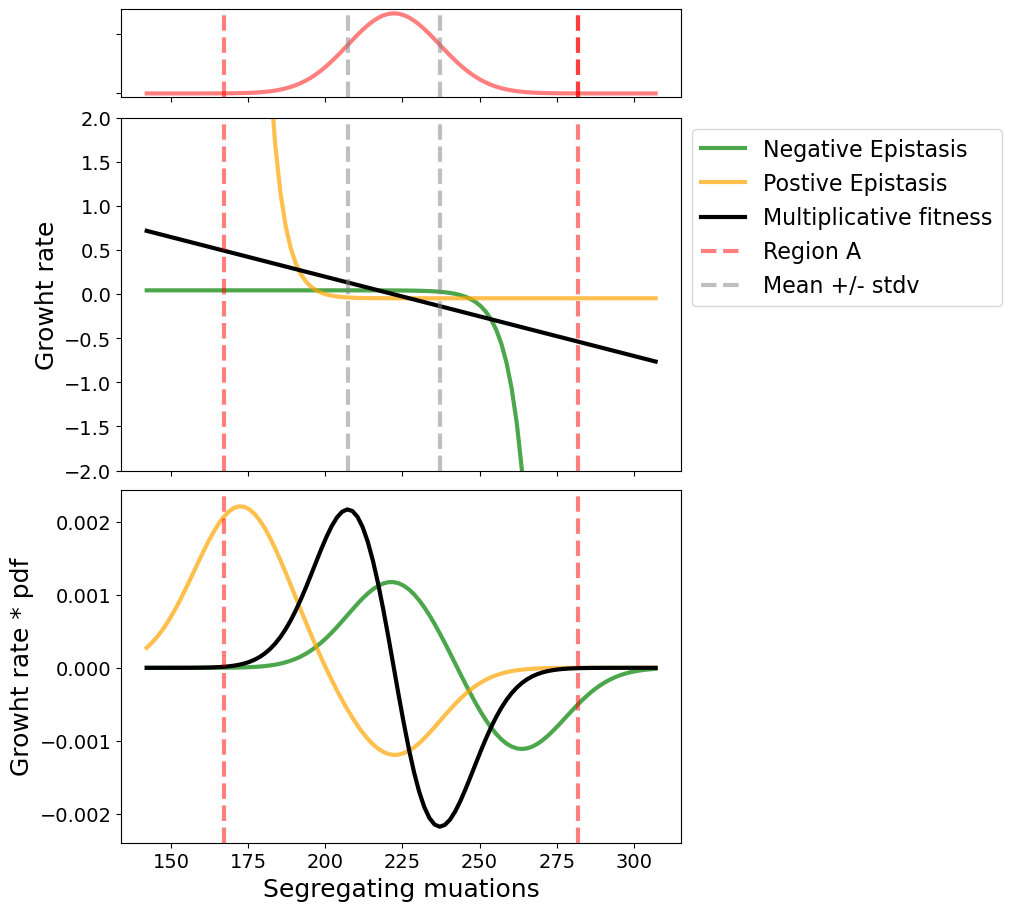

In [ ]:
negative_epistasis = 1.2
positive_epistasis = 0.8

#Generate growth rates and fitness
mult_growthrates = libs.vget_growht_rate(segregating_mutations, mean_segregating, expected_min_Kim, expected_max_Kim, Kimetalsd, 1)
negative_epist_growthrates = libs.vget_growht_rate(segregating_mutations, mean_segregating, expected_min_Kim, expected_max_Kim, Kimetalsd, negative_epistasis)
positive_epist_growthrates = libs.vget_growht_rate(segregating_mutations, mean_segregating, expected_min_Kim, expected_max_Kim, Kimetalsd, positive_epistasis)

mult_fitness = libs.get_fitness(mult_growthrates)
negative_epis_fitness = libs.get_fitness(negative_epist_growthrates)
positive_epis_fitness = libs.get_fitness(positive_epist_growthrates)

# Generating segregating mutations pdf
pdf = norm.pdf(segregating_mutations, mean_segregating, stdv_segregating)

# Generate pdf*growthrate
mult_growthrate_pdf = pdf * mult_growthrates
negative_epist_growthrate_pdf = pdf * negative_epist_growthrates
positive_epist_growthrate_pdf = pdf * positive_epist_growthrates

fig, axs = plt.subplot_mosaic([['hist'],
                               ['main'],
                               ['pdftimesgrowthrate']],
                              figsize=(10, 9),  # Set width and height as a tuple
                              height_ratios=(1, 4, 4),
                              layout='constrained')

# the main plot:
axs['main'].plot(segregating_mutations, negative_epist_growthrates, label='Negative Epistasis', alpha=0.7, color='green')
axs['main'].plot(segregating_mutations, positive_epist_growthrates, label='Postive Epistasis', alpha=0.7, color = 'orange')
axs['main'].plot(segregating_mutations, mult_growthrates, label='Multiplicative fitness', color='black')
axs['main'].tick_params(axis="x", labelbottom=False)
axs['main'].set_ylabel('Growht rate')
axs['main'].axvline(x=expected_min_Kim, color='red', linestyle='--', alpha=0.5, label='Region A')
axs['main'].axvline(x=expected_max_Kim, color='red', linestyle='--', alpha=0.5)
axs['main'].axvline(x=mean_segregating+stdv_segregating, color='gray', linestyle='--', alpha=0.5, label='Mean +/- stdv')
axs['main'].axvline(x=mean_segregating-stdv_segregating, color='gray', linestyle='--', alpha=0.5)
axs['main'].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs['main'].set_ylim(-2, 2)

axs['pdftimesgrowthrate'].plot(segregating_mutations, negative_epist_growthrate_pdf, label='Negative Epistasis', alpha=0.7, color='green')
axs['pdftimesgrowthrate'].plot(segregating_mutations, positive_epist_growthrate_pdf, label='Positive Epistasis', alpha=0.7, color = 'orange')
axs['pdftimesgrowthrate'].plot(segregating_mutations, mult_growthrate_pdf, label='Multiplicative fitness', color='black')
axs['pdftimesgrowthrate'].set_xlabel('Segregating muations')
axs['pdftimesgrowthrate'].set_ylabel('Growht rate * pdf')
axs['pdftimesgrowthrate'].axvline(x=expected_min_Kim, color='red', linestyle='--', alpha=0.5, label='Region A')
axs['pdftimesgrowthrate'].axvline(x=expected_max_Kim, color='red', linestyle='--', alpha=0.5)

axs['hist'].plot(segregating_mutations, pdf, color='red', alpha=0.5, label='Region A')
axs['hist'].tick_params(axis="x", labelbottom=False)
axs['hist'].tick_params(axis="y", labelleft=False)
axs['hist'].axvline(x=expected_min_Kim, color='red', linestyle='--', alpha=0.5, label='Region A')
axs['hist'].axvline(x=expected_max_Kim, color='red', linestyle='--', alpha=0.5)
axs['hist'].axvline(x=expected_max_Kim, color='red', linestyle='--', alpha=0.5)
axs['hist'].axvline(x=mean_segregating+stdv_segregating, color='gray', linestyle='--', alpha=0.5, label='Mean +/- stdv')
axs['hist'].axvline(x=mean_segregating-stdv_segregating, color='gray', linestyle='--', alpha=0.5)


fig.savefig('graphs/strongepis_growth_rates_model.png', bbox_inches='tight') 
plt.show()
plt.close()

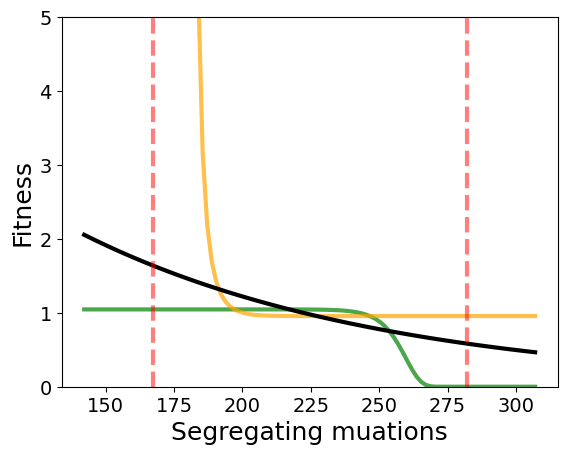

In [ ]:
plt.plot(segregating_mutations, negative_epis_fitness, label='Negative Epistasis', alpha=0.7, color='green')
plt.plot(segregating_mutations, positive_epis_fitness, label='Positive Epistasis', alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_fitness, label='Multiplicative fitness', color='black')
plt.xlabel('Segregating muations')
plt.ylabel('Fitness')
plt.axvline(x=expected_min_Kim, color='red', linestyle='--', alpha=0.5, label='Region A')
plt.axvline(x=expected_max_Kim, color='red', linestyle='--', alpha=0.5)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0, 5)
plt.savefig('graphs/fitnessmodel.png', bbox_inches='tight') 
plt.show()
plt.close()

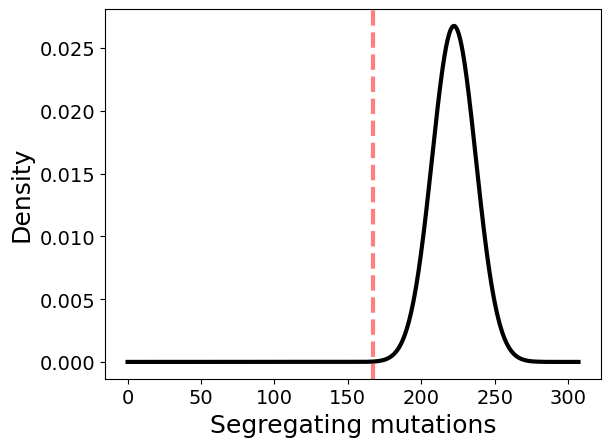

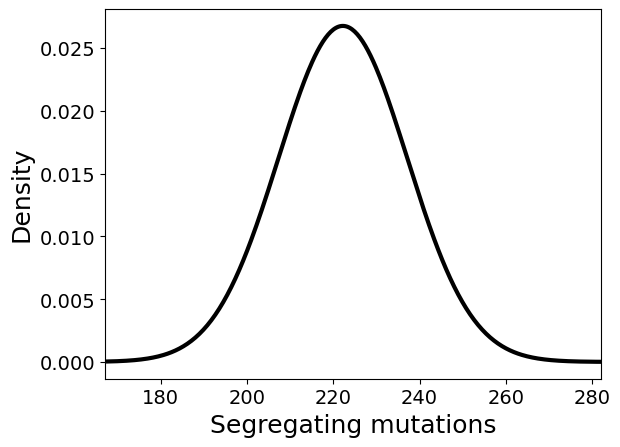

In [ ]:
# Generatinf segregating mutations pdf
plottingsegregating_mutations = np.linspace(0, expected_max_Kim+interval_span, 1000)
pdf = norm.pdf(plottingsegregating_mutations, mean_segregating, stdv_segregating)

# Plot the PDF
plt.plot(plottingsegregating_mutations, pdf, color='black')
plt.axvline(x=expected_min_Kim, color='red', linestyle='--', alpha=0.5)
plt.xlabel('Segregating mutations')
plt.ylabel('Density')
plt.savefig('graphs/full_pdf_segregatingmutations.png', bbox_inches='tight')
plt.show()
plt.close()

# Plot the PDF
plt.plot(plottingsegregating_mutations, pdf, color='black')
plt.xlabel('Segregating mutations')
plt.ylabel('Density')
plt.xlim(expected_min_Kim, expected_max_Kim) # Replace xmin and xmax with desired values
plt.savefig('graphs/pdf_segregatingmutations.png', bbox_inches='tight')
plt.show()
plt.close()
